In [348]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re

import warnings
warnings.filterwarnings('ignore')

In [375]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [376]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\교통사고정보개방시스템\보행자무단횡단 사고다발지역정보\*')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\교통사고정보개방시스템\\보행자무단횡단 사고다발지역정보\\10_20_jaywalking.csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\교통사고정보개방시스템\\보행자무단횡단 사고다발지역정보\\AccidentHazard_CodeList.xlsx']

In [377]:
meta_df = pd.read_excel(files[1],sheet_name=[0])
df = pd.read_csv(files[0],encoding='cp949')
df.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,169921,2013114,1114015400,111104001,서울 서울중부1,서울특별시 중구 오장동(오장동사거리 부근),4,4,0,3,1,0,127.003907,37.564700,"{""type"":""Polygon"",""coordinates"":[[[127.0063079..."
1,167194,2013114,1114016500,111104002,서울 서울중부2,서울특별시 중구 황학동(신당중앙시장 부근),5,5,0,3,1,1,127.018625,37.565558,"{""type"":""Polygon"",""coordinates"":[[[127.0210259..."
2,167581,2013114,1114016200,111104003,서울 서울중부3,서울특별시 중구 신당동(운동장평화시장 부근),8,9,0,7,2,0,127.014246,37.567988,"{""type"":""Polygon"",""coordinates"":[[[127.0166473..."
3,167209,2013114,1114017100,111105001,서울 서울남대문1,서울특별시 중구 중림동(중림삼거리_청파로_진입 부근),4,4,0,3,0,1,126.968318,37.559948,"{""type"":""Polygon"",""coordinates"":[[[126.9707189..."
4,167544,2013114,1114011700,111105002,서울 서울남대문2,서울특별시 중구 남대문로4가(숭례문_남대문로_진입_1 부근),4,4,1,1,2,0,126.977640,37.561026,"{""type"":""Polygon"",""coordinates"":[[[126.980041,..."


In [378]:
meta_df = meta_df[0].fillna(method='ffill').groupby([' ','년도'],as_index=False)['searchYearCd 입력값'].max()

In [379]:
meta_df[' '] = meta_df[' '].apply(lambda x:x.replace('\n',' '))
meta_df['구분'] = meta_df.apply(lambda x:x['년도'].split()[0] + ' ' + x[' '],axis=1)

In [380]:
meta_df

,,년도,searchYearCd 입력값,구분
0,결빙 사고다발지역,13-17년 결빙 사고다발지역,2018091.0,13-17년 결빙 사고다발지역
1,결빙 사고다발지역,14-18년 결빙 사고다발지역,2019079.0,14-18년 결빙 사고다발지역
2,결빙 사고다발지역,15-19년 결빙 사고다발지역,2020036.0,15-19년 결빙 사고다발지역
3,결빙 사고다발지역,16-20년 결빙 사고다발지역,2021029.0,16-20년 결빙 사고다발지역
4,결빙 사고다발지역,17-21년 결빙 사고다발지역,2022082.0,17-21년 결빙 사고다발지역
...,...,...,...,...
73,지자체별 사고다발지역,18년 지자체별 사고다발지,2019056.0,18년 지자체별 사고다발지역
74,지자체별 사고다발지역,19년 지자체별 사고다발지,2020087.0,19년 지자체별 사고다발지역
75,지자체별 사고다발지역,20년 지자체별 사고다발지,2021056.0,20년 지자체별 사고다발지역
76,지자체별 사고다발지역,21년 지자체별 사고다발지,2022046.0,21년 지자체별 사고다발지역


In [381]:
def convert_id(x):
    idx = meta_df[meta_df['searchYearCd 입력값']==x].index[0]
    return meta_df['구분'].loc[idx]
df['사고다발지ID'] = df['사고다발지ID'].apply(convert_id)

In [382]:
df['시도'] = df['시도시군구명'].apply(lambda x:x.split()[0])
df['구군'] = df['시도시군구명'].apply(lambda x:re.search(r'[^0-9]*',x.split()[1])[0])

In [383]:
def convert_city(x):
    if x =='서울특별시':
        return '서울'
    elif x=='부산광역시':
        return '부산'
    elif x=='광주광역시':
        return '광주'
    elif x=='울산광역시':
        return '울산'
    elif x=='대구광역시':
        return '대구'
    elif x=='대전광역시':
        return '대전'
    elif x=='인천광역시':
        return '인천'
    elif x=='경기도' or x=='경기남부' or x=='경기북부':
        return '경기'
    elif x=='전라북도':
        return '전북'
    elif x=='전라남도':
        return '전남'
    elif x=='충청북도':
        return '충북'
    elif x=='충청남도':
        return '충남'
    elif x=='경상북도':
        return '경북'
    elif x=='경상남도':
        return '경남'
    elif x=='강원도':
        return '강원'
    elif x=='제주특별자치도':
        return '제주'
    else:
        return x
df['시도'] = df['시도'].apply(convert_city)

In [384]:
def convert_area(x):
    if '남부' in x or '중부' in x or '북부' in x or '서부' in x or '동부' in x:
        x = x[:-1]
    if '서울' in x:
        if x=='서울서':
            return '서부'
        if '수서' in x:
            return '수서구'
        if '서초' in x:
            return '서초구'
        if '서대문' in x:
            return '서대문구'
        if '강서' in x:
            return '강서구'
        if '혜화' in x:
            return '종로구'
        if '방배' in x:
            return '서초구'
        if '종암' in x:
            return '성북구'
        return re.search(r'[^ 서울]+',x)[0]+'구'
    elif '대구' in x:
        if '달성' in x:
            return '달성구'
        return re.search(r'[^ 대구]+',x)[0]+'구'
    elif '대전' in x:
        return re.search(r'[^ 대전]+',x)[0]+'구'
    elif '울산' in x:
        if x=='울산울주':
            return '울주구'
        return re.search(r'[^ 울산]+',x)[0]+'구'
    elif '인천' in x:
        if '계양' in x:
            return '계양구'
        if x=='인천강화':
            return '강화도'
        return re.search(r'[^ 인천]+',x)[0]+'구'
    elif '광주' in x:
        if x=='광주':
            return x
        if x=='광주광산':
            return '광산구'
        return re.search(r'[^ 광주]+',x)[0]+'구'
    elif '부산' in x:
        if '부산진' in x:
            return '부산진구'
        elif '동래' in x:
            return '동래구'
        else:
            return re.search(r'[^ 부산]+',x)[0]+'구'
    else:
        if '분당' in x:
            return '분당'
        if '안산' in x:
            return '안산'
        if '수원' in x:
            return '수원'
        if '부천' in x:
            return '부천'
        if '성남' in x:
            return '성남'
        if '고양' in x:
            return '고양'
        if '용인' in x:
            return '용인'
        if '화성' in x:
            return '화성'
        if '안양' in x:
            return '안양'
        if '안성' in x:
            return '안성'
        if '일산' in x:
            return '일산'
        if '파주' in x:
            return '파주'
        if '군포' in x:
            return '군포'
        if '포천' in x:
            return '포천'
        if '양주' in x:
            return '양주'
        if '동두천' in x:
            return '동두천'
        if '남양주' in x:
            return '남양주'
        if x=='강릉시':
            return '강릉'
        if x=='속초시':
            return '속초'
        if '청주' in x:
            return '청주'
        if '천안' in x:
            return '천안'
        if x=='논산시':
            return '논산'
        if x=='서산시':
            return '서산'
        if x=='공주시':
            return '공주'
        if '전주' in x:
            return '전주'
        if x=='군산시':
            return '군산'
        if x=='익산시':
            return '익산'
        if x=='정읍시':
            return '정읍'
        if x=='김제시':
            return '김제'
        if x=='여수시':
            return '여수'
        if x=='영광군':
            return '영광'
        if x=='순천시':
            return '순천'
        if '포항' in x:
            return '포항'
        if x=='영천시':
            return '영천'
        if '김해' in x:
            return '김해'
        if '마산' in x:
            return '마산'
        if '창원' in x:
            return '창원'
        if x=='진주시':
            return '진주'
        if x=='통영시':
            return '통영'
        if '제주' in x:
            return '제주'
        return x
df['구군'] = df['구군'].apply(convert_area)

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사고다발지FID  2627 non-null   int64  
 1   사고다발지ID   2627 non-null   object 
 2   법정동코드     2627 non-null   int64  
 3   지점코드      2627 non-null   int64  
 4   시도시군구명    2627 non-null   object 
 5   지점명       2627 non-null   object 
 6   발생건수      2627 non-null   int64  
 7   사상자수      2627 non-null   int64  
 8   사망자수      2627 non-null   int64  
 9   중상자수      2627 non-null   int64  
 10  경상자수      2627 non-null   int64  
 11  부상신고자수    2627 non-null   int64  
 12  경도        2627 non-null   float64
 13  위도        2627 non-null   float64
 14  다발지역폴리곤   2627 non-null   object 
 15  시도        2627 non-null   object 
 16  구군        2627 non-null   object 
dtypes: float64(2), int64(9), object(6)
memory usage: 349.0+ KB


In [386]:
df.describe()

,사고다발지FID,법정동코드,지점코드,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
count,2.627000e+03,2.627000e+03,2.627000e+03,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000
mean,4.169749e+06,3.150289e+09,2.161099e+08,5.635706,6.012943,0.378759,3.242863,2.163685,0.227636,127.497078,36.534176
std,3.008783e+06,1.301610e+09,1.296312e+08,2.534782,2.834047,0.631170,2.198200,1.608670,0.537219,0.865507,1.111339
min,1.670410e+05,1.111012e+09,1.111000e+07,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,126.264111,33.248387
25%,2.202535e+05,2.623010e+09,1.124110e+08,4.000000,4.000000,0.000000,2.000000,1.000000,0.000000,126.900897,35.498626
50%,6.223137e+06,3.014011e+09,1.911470e+08,5.000000,5.000000,0.000000,3.000000,2.000000,0.000000,127.063535,37.057597
75%,6.545886e+06,4.172525e+09,2.823060e+08,6.000000,7.000000,1.000000,4.000000,3.000000,0.000000,128.418854,37.509489
max,6.710391e+06,5.013032e+09,5.021040e+08,27.000000,31.000000,4.000000,22.000000,11.000000,8.000000,129.432421,38.210885


In [361]:
df.describe(include=np.object)

,사고다발지ID,시도시군구명,지점명,다발지역폴리곤,시도,구군
count,2627,2627,2627,2627,2627,2627
unique,9,1149,2382,2585,16,173
top,10-12년 무단횡단사고 다발지역,경남 김해중부1,서울특별시 광진구 화양동(건대입구역 부근),"{""type"":""Polygon"",""coordinates"":[[[127.4293316...",서울,중구
freq,564,8,5,2,589,110


**연도별 사상자 및 비율은?**

**각 시도의 연도별 발생건수는?**

**각 시도의 구군별 발생건수는?**

## 시각화

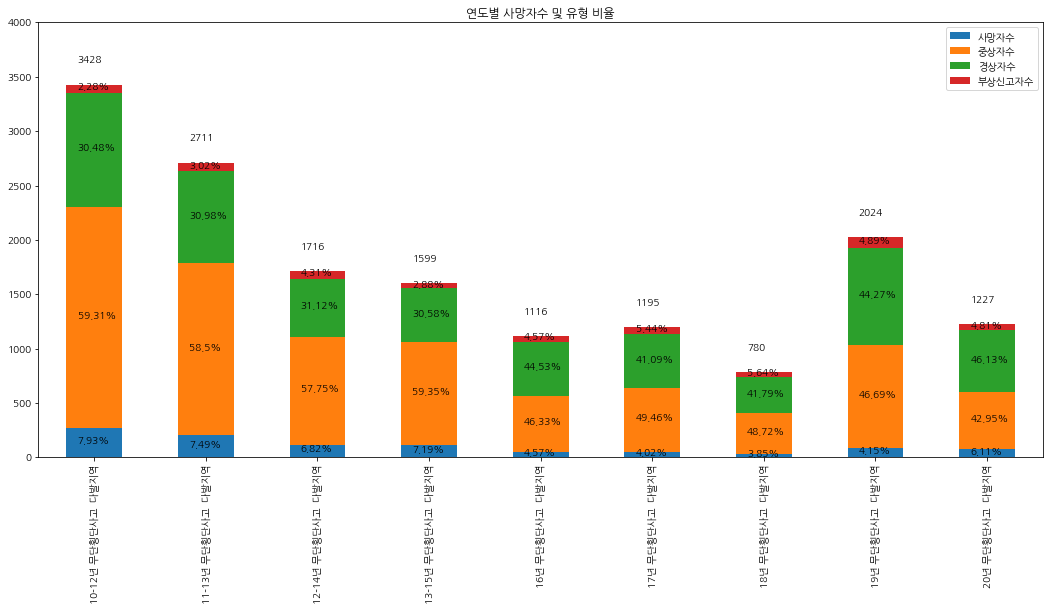

In [296]:
fig,axes = plt.subplots(1,1,figsize=(18,8))
axes.set_ylim([0,4000])
axes.set_title('연도별 사망자수 및 유형 비율')
sub_df = df.groupby('사고다발지ID',as_index=False)[['사망자수','중상자수','경상자수','부상신고자수']].sum()
bars = sub_df.iloc[:,[1,2,3,4]].plot(kind='bar', stacked=True,ax=axes)
xticks = plt.xticks([i for i in range(len(sub_df))],labels=sub_df['사고다발지ID'].values)
for i in range(len(sub_df)):
    height = axes.patches[i].get_height() + axes.patches[i+9].get_height() + axes.patches[i+18].get_height() + axes.patches[i+27].get_height()
    h1 = round(axes.patches[i].get_height()/height*100,2)
    h2 = round(axes.patches[i+9].get_height()/height*100,2)
    h3 = round(axes.patches[i+18].get_height()/height*100,2)
    h4 = round(axes.patches[i+27].get_height()/height*100,2)
    height = int(height)
    ann_height = height+200
    axes.annotate(str(height),(axes.patches[i].get_x()+0.1, ann_height))
    axes.annotate(str(h1)+'%',(axes.patches[i].get_x()+0.1, 0.5*h1/100*height))
    axes.annotate(str(h2)+'%',(axes.patches[i].get_x()+0.1, (h1+0.5*h2)/100*height))
    axes.annotate(str(h3)+'%',(axes.patches[i].get_x()+0.1, (h1+h2+0.5*h3)/100*height))
    axes.annotate(str(h4)+'%',(axes.patches[i].get_x()+0.1, (h1+h2+h3+0.5*h4)/100*height))

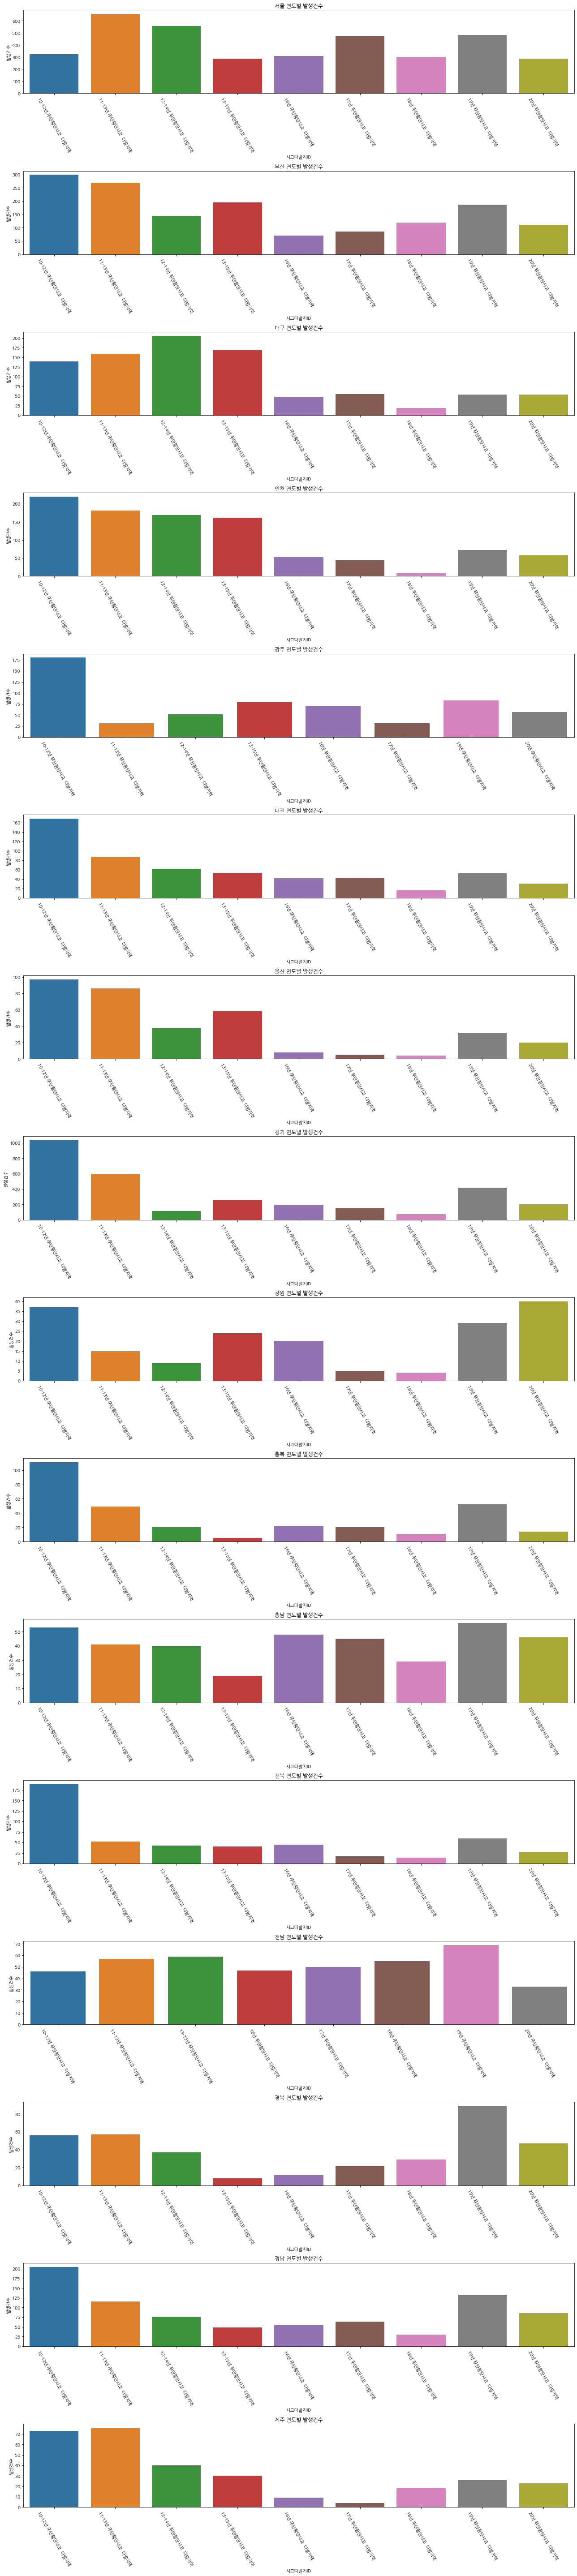

In [297]:
fig,axes = plt.subplots(16,1,figsize=(18,80))
for i,c in enumerate(df['시도'].unique()):
    sub_df = df[df['시도']==c].groupby('사고다발지ID',as_index=False)['발생건수'].sum()
    sns.barplot(data=sub_df,x='사고다발지ID',y='발생건수',ax=axes[i]).set(title=f'{c} 연도별 발생건수')
    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=-60)
plt.tight_layout()

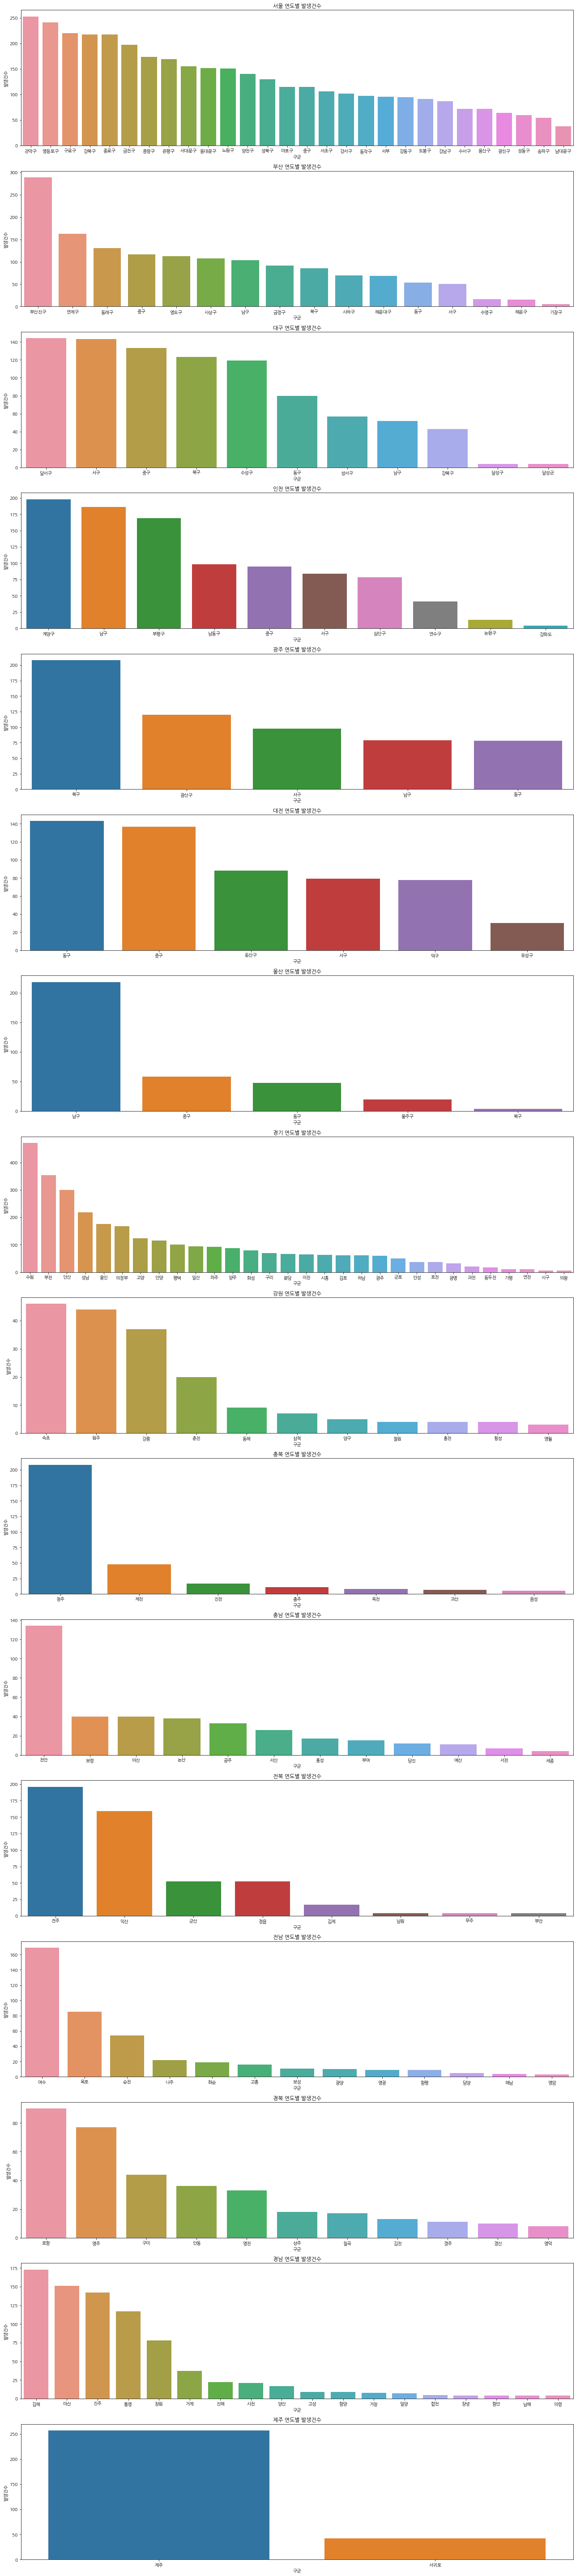

In [388]:
fig,axes = plt.subplots(16,1,figsize=(18,80))
for i,c in enumerate(df['시도'].unique()):
    sub_df = df[df['시도']==c].groupby('구군',as_index=False)['발생건수'].sum().sort_values('발생건수',ascending=False)
    sns.barplot(data=sub_df,x='구군',y='발생건수',ax=axes[i]).set(title=f'{c} 연도별 발생건수')
plt.tight_layout()
    